In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

In [5]:
# Wavefunction generation
from scf_runs import run_lda_he, run_casci
scf_checkfile, opt_checkfile, mf_lda = run_lda_he()
ci_checkfile, mc = run_casci(scf_checkfile, nroots=4)

He atom neutral LDA spin=0
HF
converged SCF energy = -2.85516047724274  <S^2> = 0  2S+1 = 1
LDA
converged SCF energy = -2.82670655418611  <S^2> = 4.4408921e-16  2S+1 = 1

WARN: Mulitple states found in CASCI solver. First state is used to compute the Fock matrix and natural orbitals in active space.

CASCI state   0  E = -2.87015742152925  E(CI) = -2.87015742152925  S^2 = 0.0000000
CASCI state   1  E = -1.40116327670131  E(CI) = -1.40116327670131  S^2 = 2.0000000
CASCI state   2  E = -0.950953194776060  E(CI) = -0.950953194776060  S^2 = 0.0000000
CASCI state   3  E = 0.604815912795335  E(CI) = 0.604815912795335  S^2 = 0.0000000
dict_keys(['mol', '_scf', 'verbose', 'stdout', 'max_memory', 'ncas', 'nelecas', '_ncore', 'fcisolver', 'frozen', 'extrasym', 'e_tot', 'e_cas', 'ci', 'mo_coeff', 'mo_energy', 'mo_occ', 'converged'])
Available output from CASCI: <KeysViewHDF5 ['ci', 'fci', 'mo_coeff', 'ncas', 'nelecas']>


In [ ]:
# import importlib, wftools, bosonrecipes, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools, linemin
# modules = [bosonrecipes,wftools, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools, linemin]
# for m in modules:
#     importlib.reload(m)
# import recipes


In [24]:
vmc_opt_checkfile = opt_checkfile
abvmc_opt_checkfile = 'abvmc-j-he_single.hdf5'
abvmc_opt_checkfile_noei = 'abvmc-j-he_single_noei.hdf5'

for fname in [vmc_opt_checkfile, abvmc_opt_checkfile, abvmc_opt_checkfile_noei]:
    if os.path.isfile(fname):
        os.remove(fname)

In [28]:
abvmc_vmc = 'abvmc1.hdf5'
abvmc_abvmc = 'abvmc2.hdf5'
abvmc_abvmc_noei = 'abvmc3.hdf5'

In [25]:
# VMC optimization 
pyq.OPTIMIZE(scf_checkfile, 
             vmc_opt_checkfile, 
             ci_checkfile=ci_checkfile, 
             max_iterations=6, 
             verbose=False)
# recipes.ABOPTIMIZE(scf_checkfile, "sj.hdf5", max_iterations=10, nconfig=500, verbose=False)

# Jastrow optimization results
df = pyq.read_opt(opt_checkfile)
df

,energy,iteration,error,fname
0,-2.803042,0,0.022138,he-sj.hdf5
1,-2.889331,1,0.006099,he-sj.hdf5
2,-2.895964,2,0.004337,he-sj.hdf5
3,-2.885421,3,0.003652,he-sj.hdf5
4,-2.897810,4,0.003959,he-sj.hdf5
5,-2.890693,5,0.005311,he-sj.hdf5


In [26]:
# ABVMC optimization, ionic cusp
nconfig=1000
bosonrecipes.ABOPTIMIZE(scf_checkfile, 
                  abvmc_opt_checkfile, 
                  ci_checkfile=ci_checkfile,
                  jastrow_kws = {'ion_cusp':False},
                  max_iterations=6, 
                  verbose=True,  
                  nconfig = nconfig)
recipes.read_opt(abvmc_opt_checkfile)

Number of determinants in the bosonic wavefunction= 4
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.3326303568692611
Dot product between gradient and SR step:  0.835399450480406
descent en -2.79659107150506 0.0037431990199582755
energies from correlated sampling [-2.71472286 -2.77522622 -2.82394065 -2.86218888 -2.8912216 ]
----------vmc done
Gradient norm:  0.09119336126521184
Dot product between gradient and SR step:  0.8975394569557242
descent en -2.8970955058701415 0.0015692889348633684
energies from correlated sampling [-2.9083686  -2.89992753 -2.88983338 -2.87802055 -2.86442167]
----------vmc done
Gradient norm:  0.1706573542249408
Dot product between gradient and SR step:  0.885437858215467
descent en -2.932834037330008 0.0035960343418891855
energies from correlated sampling [-2.89456374 -2.89489267 -2.8909782  -2.88246854 -2.8690004 ]
----------vmc done
Gradient norm:  0.1907168314411184
Dot product between gradient and SR step:  0.88

,energy,iteration,error,fname
0,-2.796591,0,0.003743,abvmc-j-he_single.hdf5
1,-2.897096,1,0.001569,abvmc-j-he_single.hdf5
2,-2.932834,2,0.003596,abvmc-j-he_single.hdf5
3,-2.928899,3,0.005403,abvmc-j-he_single.hdf5
4,-2.880548,4,0.003108,abvmc-j-he_single.hdf5
5,-2.895367,5,0.003925,abvmc-j-he_single.hdf5


In [27]:
# ABVMC optimization, no-ei
bosonrecipes.ABOPTIMIZE(scf_checkfile, 
                  abvmc_opt_checkfile_noei, 
                  ci_checkfile=ci_checkfile,
                  jastrow_kws = {'ei':False},
                  max_iterations=6, 
                  verbose=True,  
                  nconfig = nconfig)
recipes.read_opt(abvmc_opt_checkfile_noei)

Number of determinants in the bosonic wavefunction= 4
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  1.179307661337397
Dot product between gradient and SR step:  0.9238084717495966
descent en -2.484109396009909 0.026162011928624843
energies from correlated sampling [-1.43520179 -2.3482466  -2.80406967 -2.94255344 -2.88169808]
----------vmc done
Gradient norm:  0.5339022307825947
Dot product between gradient and SR step:  0.9035290056855693
descent en -3.0348219830263004 0.03883032656402175
energies from correlated sampling [-2.68209817 -2.77768901 -2.8593902  -2.91913879 -2.94686467]
----------vmc done
Gradient norm:  0.7186246383276352
Dot product between gradient and SR step:  0.9098236823764466
descent en -2.6286097772893258 0.04606610046948369
energies from correlated sampling [-2.16950597 -2.56011897 -2.78409456 -2.88667709 -2.90495247]
----------vmc done
Gradient norm:  0.42679990880846475
Dot product between gradient and SR step:  0.9046

,energy,iteration,error,fname
0,-2.484109,0,0.026162,abvmc-j-he_single_noei.hdf5
1,-3.034822,1,0.038830,abvmc-j-he_single_noei.hdf5
2,-2.628610,2,0.046066,abvmc-j-he_single_noei.hdf5
3,-2.894545,3,0.025811,abvmc-j-he_single_noei.hdf5
4,-2.894905,4,0.020768,abvmc-j-he_single_noei.hdf5
5,-2.848469,5,0.018052,abvmc-j-he_single_noei.hdf5


In [29]:
#ABVMC with VMC jastrows
#
#
for fname in [abvmc_vmc]:
    if os.path.isfile(fname):
        os.remove(fname)
nblocks = 100
nsteps_per_block = 10
tstep=0.3
nconfig=1000
recipes.VMC(scf_checkfile, 
              abvmc_vmc, 
               # jastrow_kws = {'ion_cusp':False},
              load_parameters=opt_checkfile, verbose=True,  
              nblocks=nblocks, 
              nsteps_per_block=nsteps_per_block,
              tstep= tstep, 
              nconfig=nconfig)

----------------------------------------------------------------------------------------------------vmc done


In [30]:
#ABVMC with ABVMC jastrows
#
#
bosonrecipes.ABVMC(scf_checkfile, 
                  abvmc_abvmc, 
                  load_parameters=abvmc_opt_checkfile, 
                   jastrow_kws = {'ion_cusp':False},
                   verbose=True,  
                  nblocks=nblocks, 
                  nsteps_per_block=nsteps_per_block,
                  tstep= tstep, 
                  nconfig=nconfig)

Number of determinants in the bosonic wavefunction= 1
Using spherical guess
----------------------------------------------------------------------------------------------------vmc done


In [31]:
#ABVMC with ABVMC jastrows
#
#
bosonrecipes.ABVMC(scf_checkfile, 
                  abvmc_3, 
                  load_parameters=abvmc_opt_checkfile_noei, 
                   jastrow_kws = {'ei':False},
                   verbose=True,  
                  nblocks=nblocks, 
                  nsteps_per_block=nsteps_per_block,
                  tstep= tstep, 
                  nconfig=nconfig)

Number of determinants in the bosonic wavefunction= 1
Using spherical guess
----------------------------------------------------------------------------------------------------vmc done


Text(0, 0.5, 'Energy (Ha)')

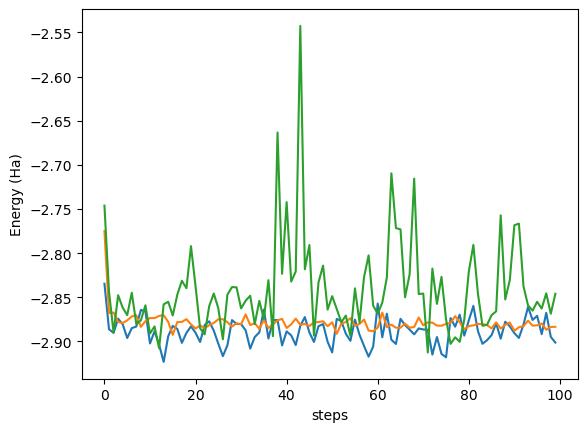

In [32]:
with h5py.File(abvmc_1) as f:
    etot_abvmc_1 = f['energytotal'][...] 
plt.plot(etot_abvmc_1)

with h5py.File(abvmc_2) as f:
    etot_abvmc_2 = f['energytotal'][...] 
plt.plot(etot_abvmc_2)

with h5py.File(abvmc_3) as f:
    etot_abvmc_3 = f['energytotal'][...] 
plt.plot(etot_abvmc_3)

plt.xlabel('steps')
plt.ylabel('Energy (Ha)')
